请点击此处查看本环境基本用法.
Please click here for more detailed instructions.

#Python多维数组与Pandas作业

# 本实验练习数组、Series、DataFrame对象的使用，包括创建、查询、修改和维护等操作，以及存取数据文件和进行数据可视化的方法。

In [ ]:
import pandas as pd      #引入Pandas
import numpy as np       #引入numpy 
from pandas import Series, DataFrame  #从Pandas引入Series和DataFrame对象

# 1.数组的使用
“天天”、“家乐”、“联华”和“农工”四个超市都卖苹果、香蕉、桔子和芒果四种水果。使用NumPy创建一维和二维数组对象，管理超市水果价格。

In [20]:
#1)创建2个一维数组分别存储超市名称和水果名称；
import numpy as np
store=np.array(["天天","家乐","联华","农工"])
fruit=np.array(["苹果","香蕉","桔子","芒果"])


In [ ]:
#2)创建1个4×4的二维数组存放各超市的水果价格，价格由4到10的随机数生成；

price=np.random.randint(4,11,size=(4,4))
price

array([[ 8,  8,  7,  4],
       [ 5,  8,  5,  9],
       [ 8,  4,  5,  7],
       [ 8,  9, 10,  7]])

In [ ]:
#3)将“天天”的苹果价格增加1元；
price[store=="天天",fruit=="苹果"]+=1
price

array([[ 9,  8,  7,  4],
       [ 5,  8,  5,  9],
       [ 8,  4,  5,  7],
       [ 8,  9, 10,  7]])

In [ ]:
#4)将“农工”的所有水果价格减少2元；
price[store=="农工",:]-=2
price

array([[9, 8, 7, 4],
       [5, 8, 5, 9],
       [8, 4, 5, 7],
       [6, 7, 8, 5]])

In [ ]:
#5)统计四个超市各类水果的销售均价；
price.mean(axis=0)

array([7.  , 6.75, 6.25, 6.25])

In [ ]:
#6)找出桔子价格最贵的超市名称（不是编号）
store[price[:,2]==max(price[:,2])]

array(['农工'], dtype='<U2')

# 2.Series的使用
创建一个Series对象存放学校一年内各类活动次数。

In [ ]:
#1)创建Series对象存储如下信息：讲座:70, 演出:15, 科技赛:82，会议:20，球赛:8；
import pandas as pd
s=pd.Series([70,15,82,20,8],["讲座","演出","科技赛","会议","球赛"],dtype=int)
s

讲座     70
演出     15
科技赛    82
会议     20
球赛      8
dtype: int64

In [ ]:
#2)增加活动：论坛:12；
s["论坛"]=12
s

讲座     70
演出     15
科技赛    82
会议     20
球赛      8
论坛     12
dtype: int64

In [ ]:
#3)修改演出对应的值为18；
# 1
s["演出"]=17
# 2
s.loc["演出"]=18
s

讲座     70
演出     18
科技赛    82
会议     20
球赛      8
论坛     12
dtype: int64

In [ ]:
#4)查询后3个活动；
s.tail(3)

科技赛    82
会议     20
论坛     12
dtype: int64

In [ ]:
#5)查询次数大于20的活动；
# 1
s[s>20]
# 2
n=np.array(s>20)
s.iloc[n]

讲座     70
科技赛    82
dtype: int64

In [ ]:
#6)删除球赛的数据。
# 1
del s["球赛"]
# 2
s.drop("球赛",inplace=True,axis=0)
s

讲座     70
演出     15
科技赛    82
会议     20
dtype: int64

# 3. DataFrame对象的使用。
创建并访问DataFrame对象。
【提示】生成数据时，可使用numpy的arange()函数和reshape()函数。

In [ ]:
#1)创建3×3DataFrame数据对象：数据内容为1-9；行索引为字符a，b，c；列索引为字符串one，two，three；
import pandas as pd
array=np.arange(1,10).reshape(3,3)
column=np.array(["one","two","three"])
index=np.array(["a","b","c"])
df=pd.DataFrame(data=array,columns=column,index=index)
df

,one,two,three
a,1,2,3
b,4,5,6
c,7,8,9


In [ ]:
#2) 查询列索引为two和three两列数据；
df.loc[:,["two","three"]]

,two,three
a,2,3
b,5,6
c,8,9


In [ ]:
#3)查询第0行、第2行、第0列、第2列数据；
df.iloc[[0,2],[0,2]]

,one,three
a,1,3
c,7,9


In [ ]:
#4) 筛选第1列中值大于2的所有行数据，另存为data1对象；
data1=df[df.iloc[:,1]>2]
data1

,one,two,three
b,4,5,6
c,7,8,9


In [ ]:
#5) 为data1添加一列数据，列索引为four，值都为10；
# 修改原对象
data1["four"]=[10,10]
# 返回一个新对象
# data1.assign(four=[10,10])
data1

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,one,two,three,four
b,4,5,6,10
c,7,8,9,10


In [ ]:
#6) 将data1所有值大于9的数据修改为8；
data1[data1>9]=8
data1

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


,one,two,three,four
b,4,5,6,8
c,7,8,9,8


In [ ]:
#7) 删除data1中第0行数据。
data1.drop(data1.index[0],inplace=True,axis=0)
data1

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,one,two,three,four
c,7,8,9,8


# 4.数据文件读取及绘图。
【提示】
   1)读取数据时，将索引设置为Province；本题需要的数据集已经上传，注意在AI　Studio下文件路径。
       pd.read_csv('/home/aistudio/data/data12847/ProvinceGDP.csv', index_col='Province‘) 。
   2)为了使图形能显示中文，需要增加绘图字体说明：
       plt.rcParams['font.sans-serif'] = ['KaiTi']

In [2]:
#1）读取ProvinceGDP.csv文件中的各省GDP数据，保存到DataFrame对象；
import pandas as pd
ddf=pd.read_csv('/home/aistudio/data/data12847/ProvinceGDP.csv', index_col='Province')
ddf

,No,Population,GDP,ProvinceCapital,Longitude,Latitude
Province,,,,,,
河南,1,9613,14234,郑州,113.42,34.48
山东,2,9082,25326,济南,117.00,36.38
四川,3,8673,9657,成都,104.05,30.39
广东,4,7859,29863,广州,113.15,23.08
江苏,5,7381,24738,南京,118.50,32.02
河北,6,6735,13387,石家庄,114.28,38.02
湖南,7,6629,8366,长沙,113.00,28.11
安徽,8,6338,6906,合肥,117.18,31.51
湖北,9,5988,8451,武汉,114.21,30.37


In [1]:
#2)计算各省人均GDP，增加到最后1列；(注意数据中的人口单位万人，GDP单位亿元)
# ddf.assign(pGDP=ddf["GDP"]/ddf["Population"])
# dff=ddf.assign(PGDP=lambda x: x.GDP/x.Population)
dff["PGDP"]=ddf["GDP"]/ddf["Population"]
dff

NameError: name 'ddf' is not defined

In [ ]:
#3)计算全国GDP总量；
ddf["GDP"].sum()

261326

In [ ]:
#4)计算人口和GDP的相关系数；
ddf.corr().loc["Population","GDP"]

0.7140955996199457

In [3]:
#5）筛选出GDP>10000万亿的省份，显示省份和GDP值；
# buf=dff[dff["GDP"]>10000]["GDP"]
buf=pd.DataFrame(ddf[ddf["GDP"]>10000].loc[:,"GDP"])
buf

,GDP
Province,
河南,14234
山东,25326
广东,29863
江苏,24738
河北,13387
浙江,17633
辽宁,10418
上海,11658


In [ ]:
#6）将这些省份及GDP值保存到GDPTop.csv的文件中；
buf.to_csv('/home/aistudio/data/data12847/GDPTop.csv')

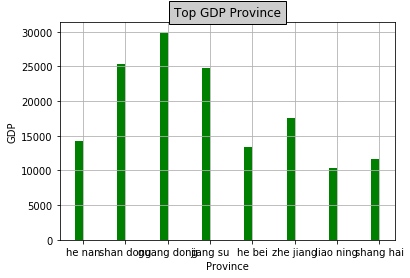

In [19]:
#7）绘制GDP>10000万亿的GDP柱状图，并保存为JPG图像。
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from snownlp import SnowNLP

GDP=np.array(buf["GDP"])
# 不支持中文，转成拼音
Province=[" ".join(SnowNLP(p).pinyin) for p in np.array(buf.index)]

width = 1.6
ind = np.linspace(0.8,60,len(GDP))

# make a square figure
fig = plt.figure(1)
ax  = fig.add_subplot(111)

# Bar Plot
ax.bar(ind-width/2,GDP,width,color='green')
# Set the ticks on x-axis

ax.set_xticks(ind)
ax.set_xticklabels(Province)

# labels
ax.set_xlabel('Province')
ax.set_ylabel('GDP')

# title
ax.set_title('Top GDP Province', bbox={'facecolor':'0.8', 'pad':5})
plt.grid(True)
plt.show()
plt.savefig("bar.jpg")
plt.close()


